In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#读取图像
img = cv.imread('./img/cat.jpg',cv.COLOR_BGR2GRAY)

In [3]:
#取值范围：0~100，数值越小，压缩比越高，图片质量损失越严重
params = [cv.IMWRITE_JPEG_QUALITY,20]
msg = cv.imencode(".jpg",img,params)[1]
msg = (np.array(msg)).tobytes()
print("msg:",len(msg))

msg: 12765


In [4]:
#取值范围：0~9，数值越小，压缩比越低，图片质量越高
params = [cv.IMWRITE_PNG_COMPRESSION,8]
msg = cv.imencode(".png",img,params)[1]
msg = (np.array(msg)).tobytes()

In [5]:
img = cv.imdecode(np.frombuffer(msg,np.uint8),cv.IMREAD_COLOR)
print(img.shape,type(img))

(414, 500, 3) <class 'numpy.ndarray'>


In [6]:
img_path = r"./img/cat.jpg"
img = cv.imread(img_path)
cv.imwrite(r"D:\ret_80.jpg",img,[cv.IMWRITE_JPEG_QUALITY,80])
cv.imwrite(r"D:\ret_40.jpg",img,[cv.IMWRITE_JPEG_QUALITY,40])
cv.imwrite(r"D:\ret_10.jpg",img,[cv.IMWRITE_JPEG_QUALITY,10])
cv.imwrite(r"D:\ret_0.jpg",img,[cv.IMWRITE_JPEG_QUALITY,0])

True

(-0.5, 499.5, 413.5, -0.5)

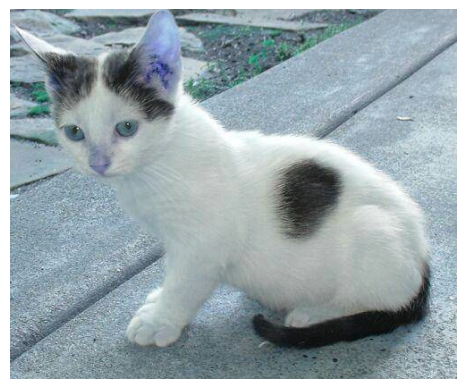

In [7]:
plt.imshow(img,cmap = "gray")
plt.axis("off")

In [8]:
img_path = r"./img/cat.jpg"
img = cv.imread(img_path)
cv.imwrite(r"D:\ret_0.png",img,[cv.IMWRITE_PNG_COMPRESSION,0])
cv.imwrite(r"D:\ret_3.png",img,[cv.IMWRITE_PNG_COMPRESSION,3])
cv.imwrite(r"D:\ret_6.png",img,[cv.IMWRITE_PNG_COMPRESSION,6])
cv.imwrite(r"D:\ret_9.png",img,[cv.IMWRITE_PNG_COMPRESSION,9])

True

In [9]:
##离散余弦变换（DCT）
#整张图DCT变换
def whole_img_dct(img_f32):
    img_dct = cv.dct(img_f32)
    img_dct_log = np.log(abs(img_dct))
    img_idct = cv.idct(img_dct)
    return img_dct_log,img_idct

#分块图DCT变换
def block_img_dct(img_f32):
    height,width = img_f32.shape[:2]
    block_y = height//8
    block_x = width//8
    height_ = block_y * 8
    width_ = block_x * 8
    img_f32_cut = img_f32[:height_,:width_]
    img_dct = np.zeros((height_,width_),dtype = np.float32)
    new_img = img_dct.copy()
    for h in range(block_y):
        for w in range(block_x):
            img_block = img_f32_cut[8*h:8*(h+1),8*w:8*(w+1)]
            img_dct[8*h:8*(h+1),8*w:8*(w+1)] = cv.dct(img_block)
            
            dct_block = img_dct[8*h:8*(h+1),8*w:8*(w+1)]
            img_block = cv.idct(dct_block)
            new_img[8*h:8*(h+1),8*w:8*(w+1)] = img_block
    img_dct_log2 = np.log(abs(img_dct))
    return img_dct_log2,new_img

C:\Users\John\AppData\Local\Temp\ipykernel_2488\4280250707.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_f32 = img_u8.astype(np.float)
C:\Users\John\AppData\Local\Temp\ipykernel_2488\3697675702.py:27: RuntimeWarning: divide by zero encountered in log
  img_dct_log2 = np.log(abs(img_dct))


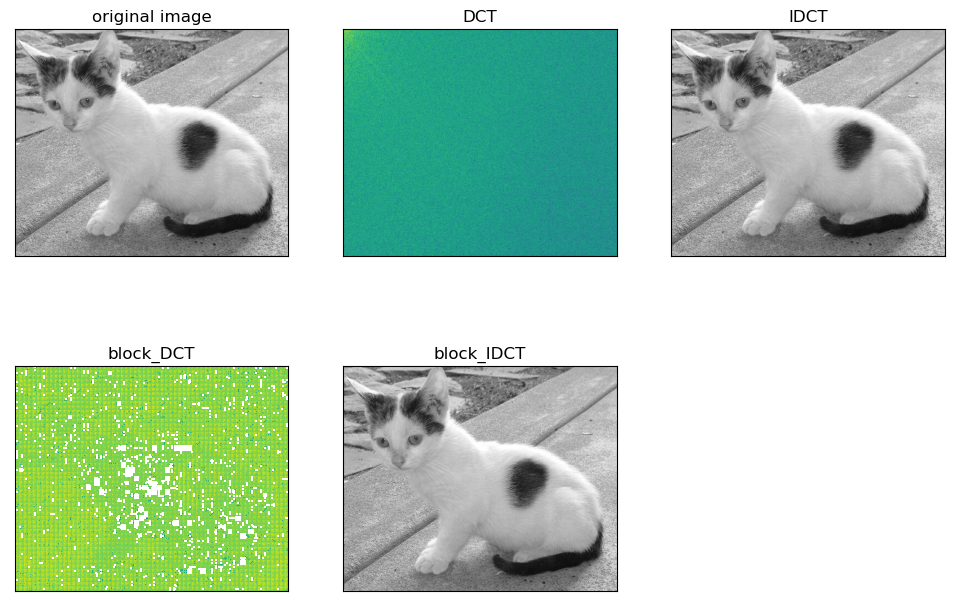

In [10]:
if __name__ =='__main__':
    img_u8 = cv.imread("./img/cat.jpg",0)
    img_f32 = img_u8.astype(np.float)
    img_dct_log,img_idct = whole_img_dct(img_f32)
    img_dct_log2,new_img = block_img_dct(img_f32.copy())
    
    plt.figure(6,figsize = (12,8))
    plt.subplot(231)
    plt.imshow(img_u8,'gray')
    plt.title('original image'),plt.xticks([]),plt.yticks([])
    plt.subplot(232)
    plt.imshow(img_dct_log)
    plt.title('DCT'),plt.xticks([]),plt.yticks([])
    plt.subplot(233)
    plt.imshow(img_idct,'gray')
    plt.title('IDCT'),plt.xticks([]),plt.yticks([])
    plt.subplot(234)
    plt.imshow(img_dct_log2)
    plt.title('block_DCT'),plt.xticks([]),plt.yticks([])
    plt.subplot(235)
    plt.imshow(new_img,'gray')
    plt.title('block_IDCT'),plt.xticks([]),plt.yticks([])
    plt.show()

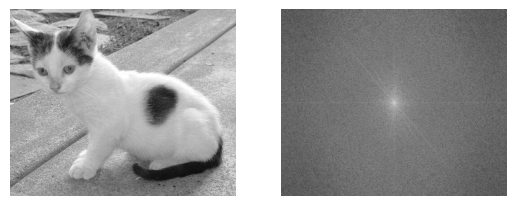

In [11]:
##离散傅里叶变换（DFT）
#以灰度形式读入
img = cv.imread("./img/cat.jpg",0)

#使用cv.dft（）进行傅里叶变换
dst = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)

#将变换后图像低频部分转移到图像的中心
dst_center = np.fft.fftshift(dst)

#使用cv.magnitude将实部和虚部转换为实部，乘以20是为了使得结果更大
result = 20 * np.log(np.abs(cv.magnitude(dst_center[:,:,0],dst_center[:,:,1])))

#显示图像
plt.subplot(121)
plt.imshow(img,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.axis("off")
plt.imshow(result,cmap = "gray")
plt.show()

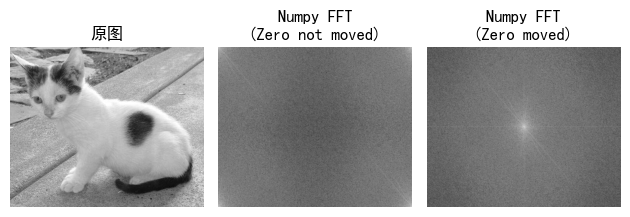

In [12]:
##傅里叶变换
#%%NumPy实现傅里叶变换
img = cv.imread('./img/cat.jpg',0)

#使用NumPy进行傅里叶变换
f = np.fft.fft2(img)

#无处理（未把零频率分量移到中间）
mid_result = 20 * np.log(np.abs(f))

#把零频率分量移到中间
fshift = np.fft.fftshift(f)
result = 20 * np.log(np.abs(fshift))

#显示图像
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.subplot(131)
plt.imshow(img,cmap = "gray")
plt.axis("off")
plt.title('原图')
plt.subplot(132)
plt.axis("off")
plt.imshow(mid_result,cmap = plt.cm.gray)
plt.title('Numpy FFT\n(Zero not moved)')
plt.subplot(133)
plt.axis("off")
plt.imshow(result,cmap = plt.cm.gray)
plt.title('Numpy FFT\n(Zero moved)')
plt.tight_layout()
plt.show()

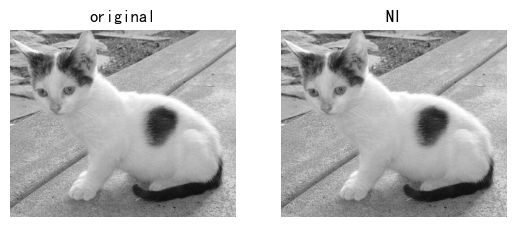

In [13]:
##逆傅里叶变换
#以灰度形式读入
img = cv.imread('./img/cat.jpg',0)

#使用cv.dft（）进行傅里叶变换
dst = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)

#将变换后图像的低频部分转移到图像的中心
dst_center = np.fft.fftshift(dst)

#
#中间可以定义相应的掩膜去留高频或者低频部分
#

#使用np.fft.ifftshift将低频移动到原来的位置
dst_origin = np.fft.ifftshift(dst_center)

#使用cv.idft进行傅里叶的逆变化
img_idft = cv.idft(dst_origin)

#使用cv.magnitude转化为空间域内
img_idft = cv.magnitude(img_idft[:,:,0],img_idft[:,:,1])

#显示图像
plt.subplot(121)
plt.imshow(img,cmap = "gray")
plt.axis("off")
plt.title('original')
plt.subplot(122)
plt.axis("off")
plt.imshow(img_idft,cmap = plt.cm.gray)
plt.title('NI'),plt.xticks([]),plt.yticks([])
plt.show()